# Lab 6 - Mathematical Distributions - Solution

In [1]:
%matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

## General Instructions

In this course, Labs are the chance to applying concepts and methods discussed in the module.
They are a low stakes (pass/fail) opportunity for you to try your hand at *doing*.
Please make sure you follow the general Lab instructions, described in the Syllabus.
The summary is:

* Discussions should start as students work through the material, first Wednesday at the start of the new Module week. 
* Labs are due by Sunday. 
* Lab solutions are released Monday.  
* Post Self Evaluation and Lab to Lab Group on Blackboard and Lab to Module on Blackboard on Monday.

The last part is important because the Problem Sets will require you to perform the same or similar tasks without guidance.
Problem Sets are your opportunity to demonstrate that you understand how to apply the concepts and methods discussed in the relevant Modules and Labs.

## Specific Instructions

1.  For Blackboard submissions, if there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.

    * do **not** use absolute paths in your notebooks. All resources should located in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * do **not** return files provided by us (data files, .py files)


2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

from pprint import pprint

sns.set(style="whitegrid")

## Problem 1

The following data are measurements of rainbow trout (in millimeters) caught in the Arolik River of Alaska.

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [3]:
trout = [572.4, 417.9, 423.3, 559.9, 459.0, 416.9, 534.4, 464.4, 476.3, 423.9, 466.0,
 437.0, 471.4, 486.2, 483.5, 470.0, 533.7, 419.5, 475.5, 485.8, 533.7, 529.5,
 464.6, 436.3, 448.0, 523.8, 457.2, 456.1, 458.0, 583.9, 455.7, 461.4, 482.9,
 505.5, 373.4, 372.3, 518.0, 472.6, 529.9, 536.3, 509.6, 475.3, 471.9, 477.1,
 488.5, 458.6, 543.6, 499.5]

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Because we only have one variable, we only have a single variable EDA. We have to assume that "explain the length of trout is the question".</p>
</div>

## Trout Length

Trout are a fresh water, oily fish [[1]](https://en.wikipedia.org/wiki/Trout) but there is no information on "demographics".
According to National Wildlife Federation, they can reach upwards of 45 inches (1143 mm) but are "usually much smaller" [[2]](https://www.nwf.org/Educational-Resources/Wildlife-Guide/Fish/Rainbow-Trout-Steelhead).
On this site, however, trout are said to typically range from 20 to 23 inches (508 to 584 mm) [[3]](http://www.muskytrouthatchery.net/pages/trout-information.html).

Trout length is measured in millimeters and is a numeric, ratio scaled variable.
The length of a trout is very likely to be the combination of various factors: food, water quality, genetics, epigenetics.
Therefore, we expect the distribution to be symmetric.

In [4]:
trout_data = pd.DataFrame({"length": trout})

In [5]:
trout_data.head(5)

,length
0,572.4
1,417.9
2,423.3
3,559.9
4,459.0


In [6]:
trout_data.describe()

,length
count,48.000000
mean,479.170833
std,46.597274
min,372.300000
25%,456.925000
50%,473.950000
75%,511.700000
max,583.900000


We're going to add another column "inches" so that we don't have to keep converting between the Metric to Imperial systems.

In [7]:
trout_data["inches"] = trout_data.length / 25.4

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>It's perfectly ok if you didn't do this. I wish the US had converted to metric in the 70s</p>
</div>

In [8]:
trout_data.describe()

,length,inches
count,48.000000,48.000000
mean,479.170833,18.864993
std,46.597274,1.834538
min,372.300000,14.657480
25%,456.925000,17.989173
50%,473.950000,18.659449
75%,511.700000,20.145669
max,583.900000,22.988189


The range of lengths is from 14.7 to nearly 23 inches.
This is probably just adult trout (as we would expect fingerlings to be finger sized or smaller).
The mean (18.86 inches) and the median (18.66 inches) are very nearly the same suggesting a symmetric distribution.

In [9]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

Freeman Diaconis:  1


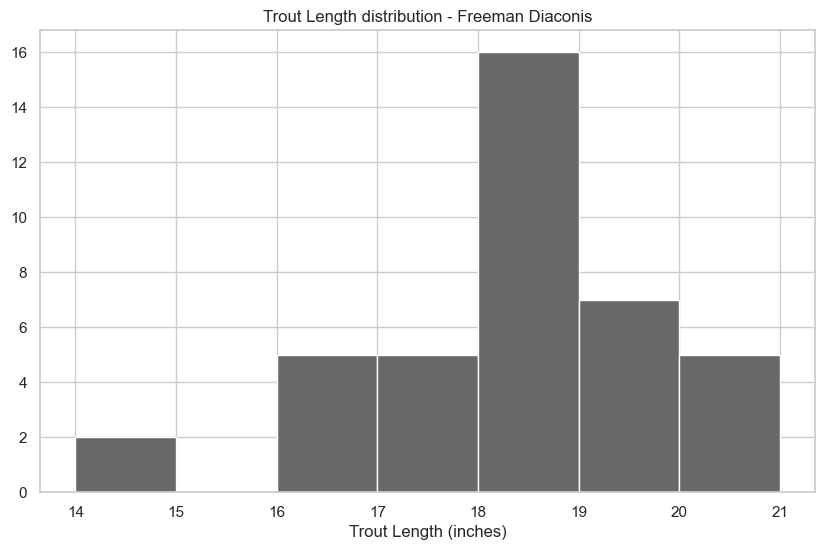

In [10]:
h = freeman_diaconis(trout_data.inches)
print("Freeman Diaconis: ", h)
mn = int(trout_data.inches.min())
mx = int(trout_data.inches.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(trout_data.inches,bins=bins, color="DimGray")
axes.set_title("Trout Length distribution - Freeman Diaconis")
axes.set_xlabel("Trout Length (inches)")

plt.show()
plt.close()

The distribution looks symmetric except for the two observations near 14 inches.
It's entirely possible with 48 observations to see some extreme values at one end or the other.
Let's increase the number of bins to 20:

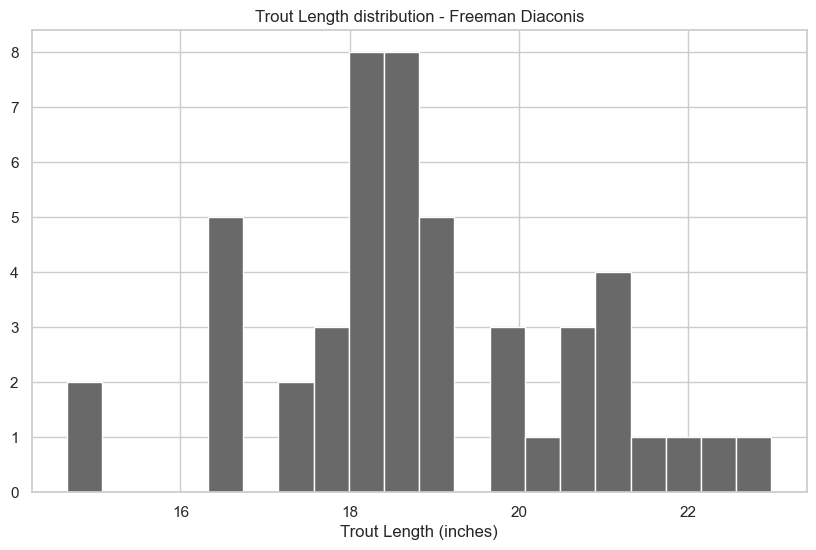

In [11]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(trout_data.inches, bins=20, color="DimGray")
axes.set_title("Trout Length distribution - Freeman Diaconis")
axes.set_xlabel("Trout Length (inches)")

plt.show()
plt.close()

This looks a bit more symmetric but with more buckets it looks like we have "missing value".
This is more an artifact of the bins than the data...we just haven't collected enough data to be this precise with our bin sizes.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p><strong>Note:</strong></p>
    <p>
        Experiment with different bin widths.
    </p>
    <p>
        If you used a KDE (Kernel Density Estimate), don't.
        They get between you and the data.
        The goal of a histogram is not to approximate the density; it's to visualize the data.
        It's not <i>meant</i> to be smooth.
    </p>
    <p>
        This also means there's noise.
    </p>
</div>

## Predictive Model of Trout Length

We want to be able to predict trout length as in, what is the length of the next trout we pull from the Arilok River likely to be?
We want to penalize large errors more than small errors and underestimates are just as bad as overestimates.
Because of this, we'll use Mean Squared Error as our loss function and we can use the mean as our prediction:

In [12]:
trout_predict = np.mean(trout_data.inches)

In [13]:
trout_predict

18.864993438320212

Because the distribution is fairly symmetric, we can use the typical 1.96 plus or minus for our 95% error bounds calculation:

In [14]:
trout_error = np.std(trout_data.inches) * 1.96

In [15]:
trout_error

3.5580428595781317

In [16]:
trout_predict, trout_predict - trout_error, trout_predict + trout_error

(18.864993438320212, 15.30695057874208, 22.423036297898342)

We predict that a (random) trout will be 18.87 inches (on average) with an error of up to 3.56 inches 95% of the time, ranging from 15.31 to 22.42 inches.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Don't make your reader do math in their head. Show the error and the plus or minus the error values.</p>
    <p>It is perfectly acceptable here to use Chebyshev's Inequality but be careful of predicting negative values.</p>
    <p><strong>This is not a confidence interval!</strong> A confidence interval is a statement about the mean value, not about a predicted value. This is an estimate of prediction error.</p>
</div>

## Data Generating Story

Trout are born, eat, evade predators and grow up.
The length of a trout is determined by many different small factors: genetics, epigenetics, food, water quality, etc.
So length is likely to be the outcome of many small affects some working to increase length and some working to decrease length.
As a result, length is very likely to follow an (approximate) normal distribution.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>We generally use "approximate" here if the values cannot be negative. This is because the Normal distribution includes negative values but measurements cannot be negative.</p>
    <p>Additionally, we avoid things like "the data <i>are</i> Normally distributed" but instead say "the Normal distribution is a good model for the data" (or whatever distribution we're talking about). Synonyms for modeling can also be used such as "approximated", "represented by", etc. What we are avoiding is a reification of the Normal distribution and, instead, focusing on modeling.</p>
    <p>You don't have to explicitly write down the Data Generating Story in the real world or at least all of it.  You can make a note of your thinking of why you think a particular distribution will be a good model for the data.</p>
</div>

## Distributional Model

We don't just want to predict the *typical* length of a Arolik River trout, therefore, we'll use a mathematical distribution as a model.
we can then use the distributional model to make some predictions about trout lengths we might encounter.
Based on the EDA and the discussion of the Data Generating Story, a Normal distribution is likely to be a good model for the data.
We've already calculated the first and second moments of the data.
The Normal distribution has two pararmeters which are, respectively, the first and second moments of the empirical distribution.

Let's plot the Normal distribution over the data:

In [17]:
from scipy.stats import norm

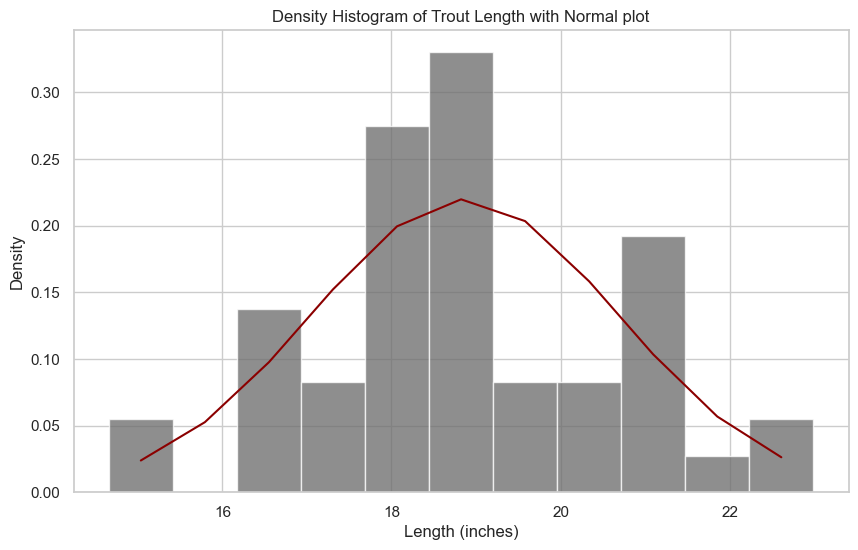

In [18]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(trout_data.inches, color="DimGray", density=True, bins=11, alpha=0.75)
axes.set_xlabel( "Length (inches)")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of Trout Length with Normal plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]    

trout_mean = np.mean(trout_data.inches)
trout_std  = np.std(trout_data.inches)
ys = [norm.pdf( k, loc=trout_mean, scale=trout_std) for k in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

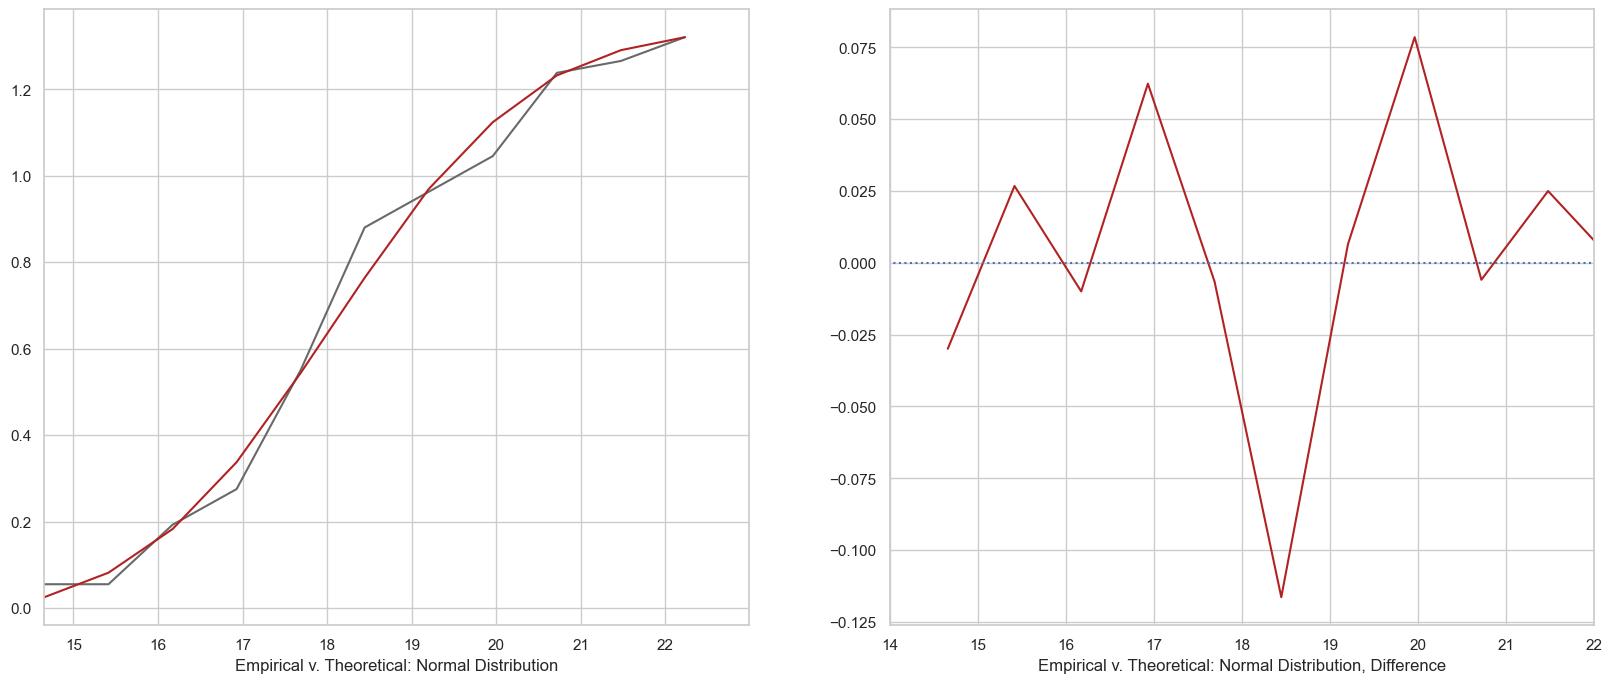

In [19]:
figure = plt.figure(figsize=(20, 8))

trout_mn = np.min(trout_data.inches)
trout_mx = np.max(trout_data.inches)
mean = np.mean(trout_data.inches)
std = np.std(trout_data.inches)

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram(trout_data.inches, bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot(base[:-1], cumulative, color="dimgray")
axes.set_xlim((trout_mn, trout_mx))

sampled_data = [mean + r * std for r in np.random.standard_normal(10000)]
values2, base = np.histogram(sampled_data, bins=base, density=True)
cumulative2 = np.cumsum(values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((trout_mn, trout_mx))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")

axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot(base[:-1], differences, color='firebrick')
axes.set_xlim((mn, mx))
axes.hlines(0, 0, 14000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")

plt.show()
plt.close()

The blue line (Normal distribution) looks like a pretty good (smooth) approximation of the red line (Empirical distribution).
As we noted before, it certainly looks like there are some fish "missing" from our data in the sense that we could observe them (say, 19.5 inches) but didn't.
This is one of the reasons mathematical distributions are sometimes better than the empirical: interpolation.
The most difficult part of these particular charts is interpreting the differences in densities.

Now we can see where the differences in the CDFs came from.
The model will predict fewer trout near the mean and more fish at the 17 and 20 inch bins.
We actually want this kind of smoothing out of transient discrepancies in a model...signal versus noise...the problem is identifying them as actually noise.

One way of testing a distributional model is *generatively*: you use the model to generate *pseudo* data and see if it looks like the observed data.
We can also measure the cumulative difference between two but we take a more Utilitarian approach: does the model work?

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>The above discussion is why we say, "is the Normal distribution a good model?" instead of "is the data Normally distributed?"</p>
    <p>Now that we have a model, from *Fundamentals*, we can answer these questions:</p>
    <p>
    <ol>
    <li>What is the probability of x or larger (use Survival Function).</li>
    <li>What is the probability of x or less (use CDF).</li>
    <li>What is the probability of x to y (CDF - CDF).</li>
    </ol>
    </p>
    <p>We can also answer the reverse question, what x or y is associated with a particular probability.</p>
</div>

### Question 1

We can use the distributional model to compare with our mean model. What is the probability of observing a trout in the 15-20 inches range?

In [20]:
stats.norm.cdf(20,trout_mean,trout_std) - stats.norm.cdf(15,trout_mean,trout_std)

0.7174680958961634

There is a 71.7% probability of observing a trout in the range of 15-20 inches.
This might mean that our Null (or Mean) Model is too closely fit to the data (because it's not 95%).

### Question 2

What is the probability of observing a trout that is 45 inches or more?

In [21]:
stats.norm.sf(45,trout_mean,trout_std)

2.7077671166402576e-47

The probability of observing a trout (in the Arolik River) that is 45 inches or more is vanishingly small.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>So there are two competing ideas here. First, we can use the mathematical distribution to smooth out our predictions (signal over noise). Second, we have to be a bit careful about making predictions <b>way</b> outside what we actually observed. We observed a max of 23 inches and we're asking the model about probabilities for 45 inches or more.</p>
    <p>This question is more of an example of what <i>not</i> to do.</p>
</div>

### Question 3

Suppose that all trout caught must be at least 17 inches. What is the probability of catching a fish that is under the legal size to keep?

In [22]:
stats.norm.cdf(17,trout_mean,trout_std)

0.15212573921438116

There is a 15.2% probability of catching a fish under the legal size limit.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Hopefully you can see why you might want a distributional model. You can ask and answer more interesting questions than, what's the size of fish I'm likely to catch.</p>
</div>

## Problem 2

The following data represent the number of days it takes a software team to clear tickets.

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [23]:
days = [8.0, 3.8, 4.0, 1.6, 2.6, 3.4, 8.7, 4.7, 6.1, 1.9, 6.0, 8.2, 2.7, 6.5, 1.9, 2.7,
 1.6, 1.3, 2.3, 3.3, 9.8, 8.3, 3.3, 4.3, 4.7, 7.2, 5.8, 3.3, 2.0, 3.2, 1.7, 2.5,
 1.6, 4.0, 4.1, 1.0, 2.7, 5.3, 7.6, 1.5, 7.1, 2.5, 2.6, 4.0, 1.3, 7.0, 4.0, 8.4,
 1.3, 5.1, 6.4, 3.1, 1.5, 4.1, 2.5, 5.5, 2.4, 1.4, 2.6, 1.9, 2.1, 2.0, 2.5, 2.2,
 2.6, 3.1, 3.6, 1.8, 3.1, 4.6, 1.2, 5.4, 6.5, 7.0, 9.7, 6.6, 9.1, 6.9, 2.5, 8.5,
 5.0, 3.2, 0.9, 3.3, 2.9, 3.9, 12.1, 3.4, 2.9, 4.6, 4.5, 1.7, 1.2, 3.6, 3.9,
 14.2, 5.3, 1.2, 0.3, 2.3, 2.9, 2.5, 0.8, 1.6, 2.7, 4.6, 4.4, 2.7, 3.5, 0.6,
 4.9, 2.2, 5.4, 6.0, 1.8, 1.0, 1.5, 4.0, 2.1, 5.6, 4.1, 1.9, 1.7, 3.8, 5.7, 4.1,
 2.3, 5.1, 8.4, 4.8, 3.7, 2.2, 2.6, 2.8, 0.5, 3.9, 2.9, 3.7, 2.6, 2.5, 11.7,
 3.3, 1.5, 7.3, 1.1, 0.3, 0.9, 0.5, 8.4, 2.8, 6.1, 3.4, 4.7, 10.0, 1.9, 5.8,
 6.4, 4.6, 0.4, 6.8, 5.3, 3.9, 1.2, 2.6, 3.4, 2.4, 3.7, 14.5, 10.3, 0.1, 0.8,
 0.4, 9.8, 6.3, 4.5, 1.0, 2.8, 5.6, 1.4, 1.7, 2.5, 1.7, 1.6, 23.0, 0.2, 3.1,
 1.5, 0.7, 2.4, 4.2, 3.0, 2.0, 8.3, 2.5, 4.4, 3.0, 5.2, 4.3, 4.7, 5.4, 1.1, 1.8,
 9.9, 2.9, 3.0, 5.8, 2.0, 0.6, 3.1, 8.2, 5.7, 4.7, 8.4, 4.1, 3.4, 2.7, 9.3, 0.6,
 0.5, 1.8, 8.4, 3.4, 10.9, 6.0, 11.3, 2.9, 1.9, 3.3, 1.7, 11.5, 6.9, 6.4, 7.4,
 2.4, 1.3, 0.7, 15.5, 4.2, 2.5, 2.0, 6.2, 3.7, 3.5, 5.3, 4.1, 2.6, 0.9, 3.1,
 1.5, 1.7, 1.8, 0.9, 0.7, 1.2, 5.0, 3.8, 3.7, 7.2, 4.0, 2.9, 16.4, 1.2, 6.8,
 0.5, 2.4, 7.7, 5.5, 4.6, 5.5, 0.3, 4.2, 5.1, 0.5, 7.0, 1.1, 0.6, 0.8, 2.2, 8.6,
 1.5, 2.8, 3.2, 7.4, 3.6, 7.9, 3.0, 3.4, 4.8, 1.9, 1.6, 0.7, 4.6, 4.3, 2.6, 7.4,
 0.1, 1.8, 6.7, 0.4, 2.0, 2.8, 2.4, 5.4, 1.2, 4.2, 3.8, 5.6, 3.0, 2.8, 5.4, 6.7,
 2.5, 3.4, 5.0, 3.7, 2.4, 3.6, 5.9, 1.9, 9.9, 4.0, 4.9, 1.9, 2.9, 3.9, 2.9, 5.5,
 8.1, 3.6, 2.1, 5.1, 11.1, 9.0, 1.8, 3.7, 1.0, 1.4, 3.9, 3.2, 0.9, 2.0, 4.5,
 2.5, 7.5, 2.5, 1.5, 0.6, 3.1, 6.0, 2.6, 1.9, 5.5, 8.7, 1.4, 2.9, 1.2, 8.1, 4.8,
 3.8, 0.6, 3.1, 6.5, 5.4, 6.3, 4.3, 7.1, 5.2, 3.7, 3.4, 1.9, 1.9, 1.0, 6.5, 2.8,
 3.6, 2.2, 3.8, 5.9, 4.6, 5.4, 2.9, 1.1, 9.5, 5.0, 13.2, 5.7, 2.2, 4.2, 3.8,
 1.4, 1.0, 2.0, 6.3, 1.8, 4.2, 1.8, 2.2, 12.4, 5.9, 5.3, 1.1, 5.6, 4.6, 2.4,
 5.4, 4.5, 0.9, 5.5, 13.9, 0.8, 3.1, 1.3, 5.7, 6.3, 2.5, 0.5, 10.1, 1.4, 1.5,
 3.8, 1.6, 4.7, 5.8]

## EDA

We have data on the days it takes for a software engineering team to clear (finish) a ticket.
These are usually administered through a system like Trello or JIRA.
We don't have any other information about the tickets, though, which we might want later.
For example, is the ticket a new feature or a bug fix?

Days is a numeric variable on a ratio scale.

In [24]:
ticket_data = pd.DataFrame({"days": days})

In [25]:
ticket_data.describe()

,days
count,423.000000
mean,4.030969
std,2.937204
min,0.100000
25%,1.900000
50%,3.400000
75%,5.400000
max,23.000000


The range is 0.1 days (0.1 x 24 = 2.4 hours) to 23 days.
The mean is 4 days and the median is 3.4 days.
The data might not be symmetric.
The difference between the 50% and 25% quartiles is 1.5 days and the difference between the 75% and 50% quartiles is 2 days.
However, the difference between the 25% and the min is 1.8 days while the difference between the 75% and max is 17.6 days.

Freeman Diaconis:  1


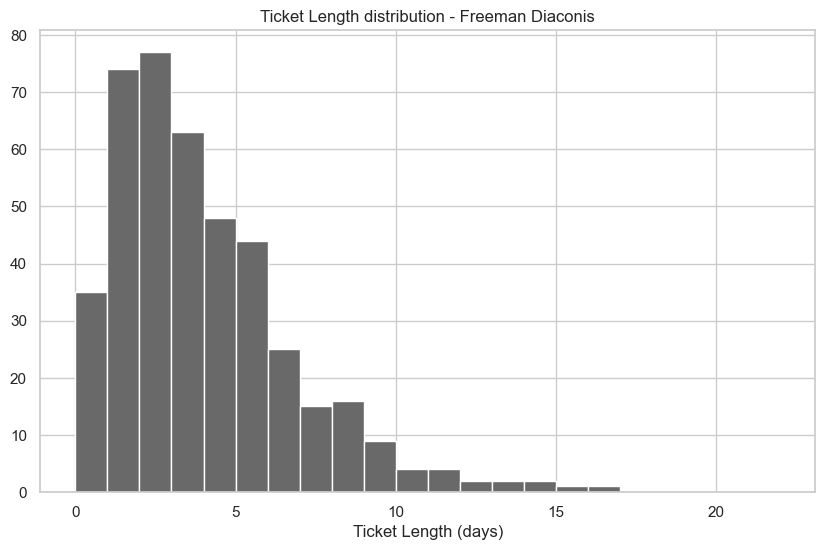

In [26]:
h = freeman_diaconis(trout_data.inches)
print("Freeman Diaconis: ", h)
mn = int(ticket_data.days.min())
mx = int(ticket_data.days.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(ticket_data.days,bins=bins, color="DimGray")
axes.set_title("Ticket Length distribution - Freeman Diaconis")
axes.set_xlabel("Ticket Length (days)")

plt.show()
plt.close()

The data are definitely skewed left with a long tale out towards the right.
It doesn't look like the Normal distribution would be a good model for this data.

### Mean Model (or Null Model)

We would like to predict the days to finish a ticket (perhaps we're working on a roadmap for next quarter).
We would like to penalize overestimates and underestimates the same.
We would also like to penalize large errors more than small errors.
This means we should should use the mean which minimizes MSE loss.

The mean days to finish a ticket is:

In [27]:
np.mean(ticket_data.days)

4.03096926713948

Looking at tickets are random, we can predict that a ticket will take 4 days to complete.

What about the error bounds?
The standard deviation of days to complete a ticket is:

In [28]:
np.std(ticket_data.days)

2.933729946833339

If we use the usual 95% error bounds, at the lower end, we have:

In [29]:
ticket_mean = np.mean(ticket_data.days)
ticket_std = np.std(ticket_data.days)

In [30]:
ticket_mean - 1.96 * ticket_std

-1.719141428653864

Is that tickets that are completed before they are assigned?
Get me that team!

Not even Chebyshev's inequality will help us because it is only defined for $k > 1$.
We will have to wait to model our data.

### Data Generating Story

The key observation here is that completing tickets is very much a standard waiting process.
A software engineer picks a ticket, works on it, tests (we hope), deploys and marks it complete.
There is an average here: days per ticket but there is also a rate here: tickets per day.
Note that this is absent in the previous problem. 
There is no trout per millimeter only millimeters per trout.
This suggests something in the general Exponential family.
Looking at the [Exponential](https://en.wikipedia.org/wiki/Exponential_distribution) we don't see anything that looks like a good model but if we look instead at the [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) it looks like we might have one.

### Distributional Model

We'll start with the Gamma distribution as a model.
We first need to figure out what our library needs in terms of parameters [Gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).
And...it's not wholly helpful.
It uses a scale and location parameter but the Gamma isn't usually parameterized this way.
Let's start with the Method of Moments estimators.

For reference, the empirical mean and standard deviation are:

In [31]:
print(ticket_mean)
print(ticket_std)

4.03096926713948
2.933729946833339


However, we need the *variance* for the second moment:

In [32]:
ticket_var = np.var(ticket_data.days)

In [33]:
print(ticket_var)

8.606771400946744


The Method of Moments parameters estimates are:

In [34]:
k = (ticket_mean**2)/ticket_var

In [35]:
k

1.8878987805852074

In [36]:
theta = ticket_var/ticket_mean

In [37]:
theta

2.1351617515691004

In [38]:
np.sqrt(k * theta**2)

2.933729946833339

Notice that these are not the same as the `mean` and `std` of the *empirical* distribution.

In [39]:
from scipy.stats import gamma

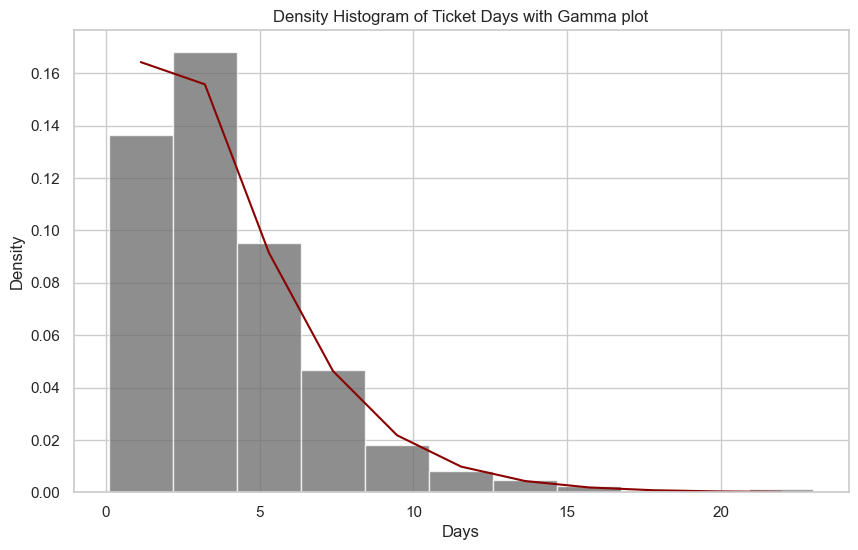

In [40]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(ticket_data.days, color="DimGray", density=True, bins=11, alpha=0.75)
axes.set_xlabel( "Days")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of Ticket Days with Gamma plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]    

ys = [gamma.pdf( x, k, loc=0, scale=theta) for x in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

How does this model fair overall?

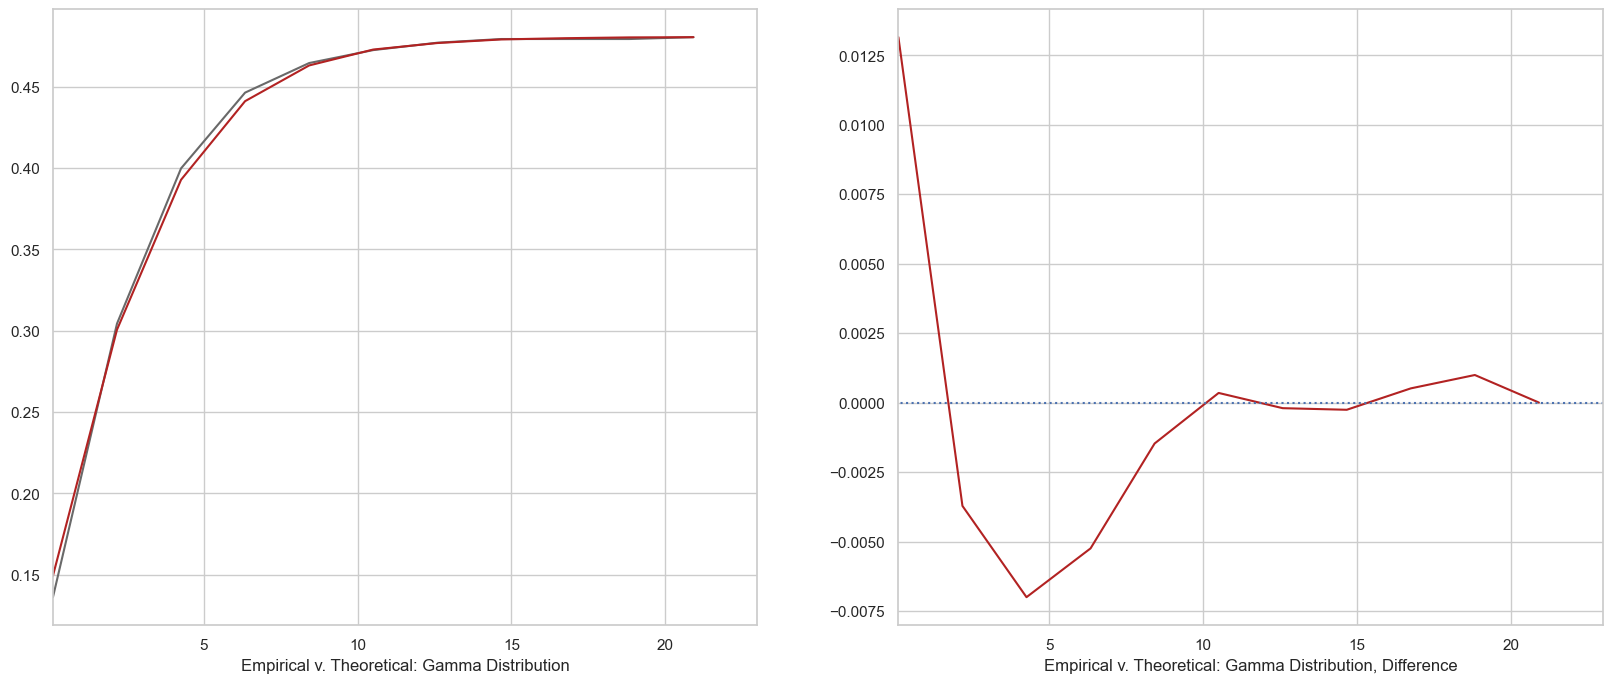

In [41]:
figure = plt.figure(figsize=(20, 8))

ticket_mn = np.min(ticket_data.days)
ticket_mx = np.max(ticket_data.days)
mean = np.mean(ticket_data.days)
std = np.std(ticket_data.days)

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram(ticket_data.days, bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot(base[:-1], cumulative, color="dimgray")
axes.set_xlim((ticket_mn, ticket_mx))

values2, base = np.histogram(gamma.rvs(k, loc=0, scale=theta, size=10000), bins=base, density=True)
cumulative2 = np.cumsum(values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((ticket_mn, ticket_mx))
axes.set_xlabel( "Empirical v. Theoretical: Gamma Distribution")

axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot(base[:-1], differences, color='firebrick')
axes.set_xlim((ticket_mn, ticket_mx))
axes.hlines(0, 0, 14000, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Gamma Distribution, Difference")

plt.show()
plt.close()

As with all models, the goodness of a model is in how well they perform.
We will cover model evaluation later in the semester but for now, we're just using our eyes to see if something is good enough.
And this model looks pretty good.

With this model, let's answer the original question which we couldn't do, what are the error bounds on the Null model?

In [42]:
gamma.ppf([0.025, 0.975], k, loc=0, scale=theta)

array([ 0.44473609, 11.47831367])

The error bounds on a prediction of 4 days (the mean) is 0.47 to 11.29 days.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>The `ppf` function opens up an additional line of exploration. Not only can we ask "what probability is associated with a particular value or values?" but we can also ask "what values are associated with a particular probability or probabilities?"</p>
</div>

### Question 1

What is the probability of finishing a ticket in less than a day?

In [43]:
gamma.cdf(1, k, loc=0, scale=theta)

0.09788735314409515

There is a 9.3% probability that a ticket takes less than a day.

### Question 2

What is the probability that a ticket takes more than a work week (5 days)?

In [44]:
gamma.sf(5, k, loc=0, scale=theta)

0.2919629262757319

There is a 29.1% probability that a ticket takes more than a work week.

### Question 3

If we use the mean as our Null model, we are almost guaranteed that 50% of the time, we'll run under and 50% of the time we'll run over. Overruns might be more damaging to the schedule (roadmap) than underruns.

Rather than use the mean (50/50), the project manager wants to know how many days it takes to finish a ticket about 2/3rds of the time?

In [45]:
gamma.ppf([0.66], k, loc=0, scale=theta)

array([4.55024597])

It takes about 4.5 days to finish a ticket 2/3rds of the time (rather than 4 days, 1/2 the time).

This might seem like a small difference but for 10 tickets, the estimate is 45 days versus 40 days.

### What about a Normal Distribution?

Is a Normal distribution a "horrible" model for this data?

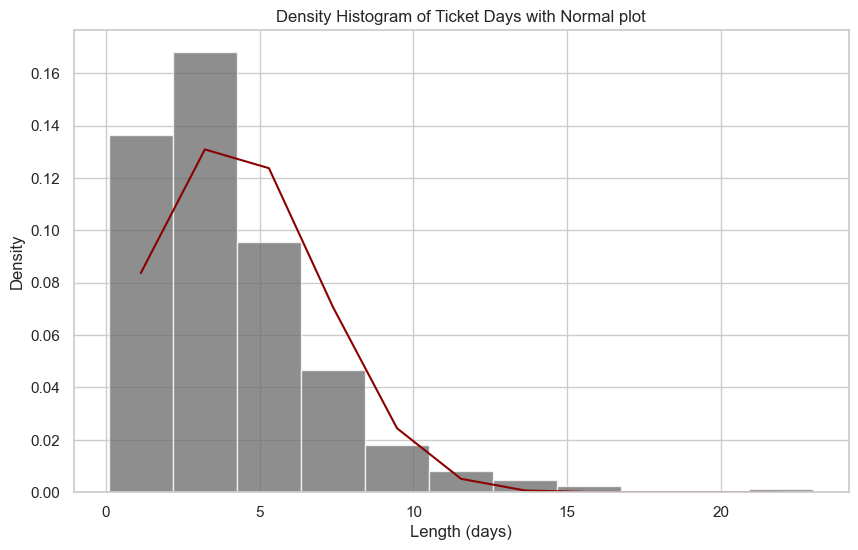

In [46]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(ticket_data.days, color="DimGray", density=True, bins=11, alpha=0.75)
axes.set_xlabel( "Length (days)")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of Ticket Days with Normal plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]    

ticket_mean = np.mean(ticket_data.days)
ticket_std  = np.std(ticket_data.days)
ys = [norm.pdf( k, loc=ticket_mean, scale=ticket_std) for k in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

It *looks* as good as the MoM Gamma model except for one small problem:

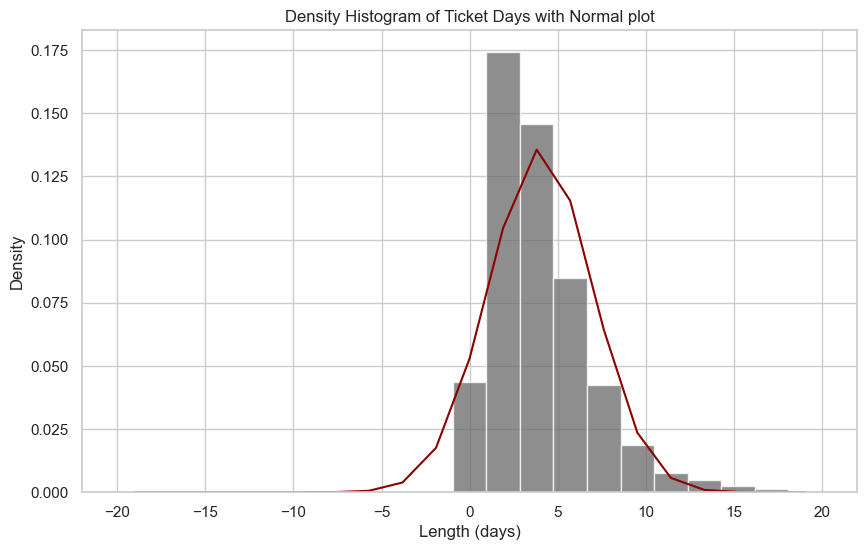

In [47]:
figure = plt.figure(figsize=(10,6))

_, bins = np.histogram(ticket_data.days, bins=21, range=(-20, 20))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(ticket_data.days, color="DimGray", density=True, bins=bins, alpha=0.75)
axes.set_xlabel( "Length (days)")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of Ticket Days with Normal plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]

ticket_mean = np.mean(ticket_data.days)
ticket_std  = np.std(ticket_data.days)
ys = [norm.pdf( k, loc=ticket_mean, scale=ticket_std) for k in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

The actual model, and thus all the probability calculations, extends into negative days.
The model is "worst" in the sense that it predicts nonsensical values.

## Problem 3

Following the pattern established in the previous two problems, build two models for BMI. (By this point, if we give you a variable and say "model it" this is what you should know to do).

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>As we have seen, sometimes these don't quite go in order. If, after EDA, you find the data isn't symmetric, you may need to model the data before creating a Null model (in order to get reasonable error bounds). For example, you might discuss the data generating story in the EDA. However, you should always start with EDA.</p>
</div>

In [48]:
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv", header=0)

## EDA


BMI or Body Mass Index is one indicator of overall health. According to Wikipedia, [BMI](https://en.wikipedia.org/wiki/Body_mass_index) is calculated as:

$$\frac{mass}{height^2}$$

The general classifications of BMI are:

![BMI](https://images.everydayhealth.com/images/heart-health/heart-failure/bad-news-if-your-bmi-is-high-fat-causes-heart-failure-1440x810.jpg?w=1110)

in $kg$/$m^2$. Despite the "square" term, it seems possible that BMI is normally distributed. That is, the BMI seems like it might be composed of small additive factors. It could also be the result of small multiplicative factors in which case it might be log-normally distributed.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Remember, when we say "it might be log-normally distributed" what we really mean is "the log-normal distribution might be a good model for the data". To get used to this way of thinking, you should <strong>always</strong> use the latter phrasing.</p>
</div>

Let's look at the summary statistics

In [49]:
insurance.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

The minimum BMI is 15.96 and the maximum is 53.13 so there are definitely *extremes* in the data but the main concentration of data indicates that the data may be normally distributed. The mean is 30.7 and the median is nearly that at 30.4. The first quartile is 26.3 and the third quartile is 34.7, both about equidistant from the median/mean.

Let's plot the data using a histogram:

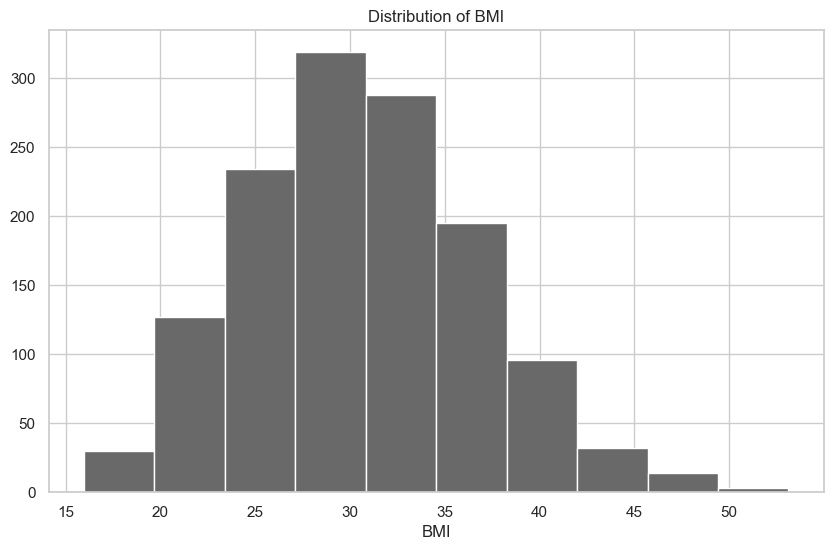

In [50]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(insurance.bmi, color="DimGray")
axes.set_title("Distribution of BMI")
axes.set_xlabel("BMI")

plt.show()
plt.close()

The data looks only slightly skewed right which makes some sense. There is lower bounds on both weight and height for most North American populations but not nearly the kind of upper bound on, at least, weight.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>Because BMI was the "target" variable here, you didn't need to talk about charges. </p>
</div>

## Null Model

We want to be able to predict BMI of a random person.
Our loss function will be MSE which means that over and under estimates are symmetric and large errors are penalized more than small errors.
Because of this, we'll use the mean as our prediction:

In [51]:
bmi_mean = np.mean(insurance.bmi)
bmi_std = np.std(insurance.bmi)

In [52]:
bmi_mean

30.66339686098655

We predict that the BMI of a random person will be 30.7.

The 95% error bounds on that estimate are:

In [53]:
bmi_mean - 1.96*bmi_std, bmi_mean + 1.96*bmi_std

(18.715417883471275, 42.61137583850182)

That is, we expect to see a range of values for BMI from 18.7 to 42.6 about 95% percent of the time).

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>If you want to experiment, this might be a great time to try your hand a gradient descent and a hybrid loss function. For examplek it might be more costly to overestimate or underestimate someone's BMI.</p>
    <p>It is also worth noting that the error bounds is quite large. This might not be a good model. The only way to know if it's a good model is if it's sufficient for our needs. Even if it's not a good model, we can use it as a baseline to judge improvements in our modeling.</p>
</div>

### Distributional Model

Based on visual inspection, it seems like the Normal distribution will be a good model for this data.

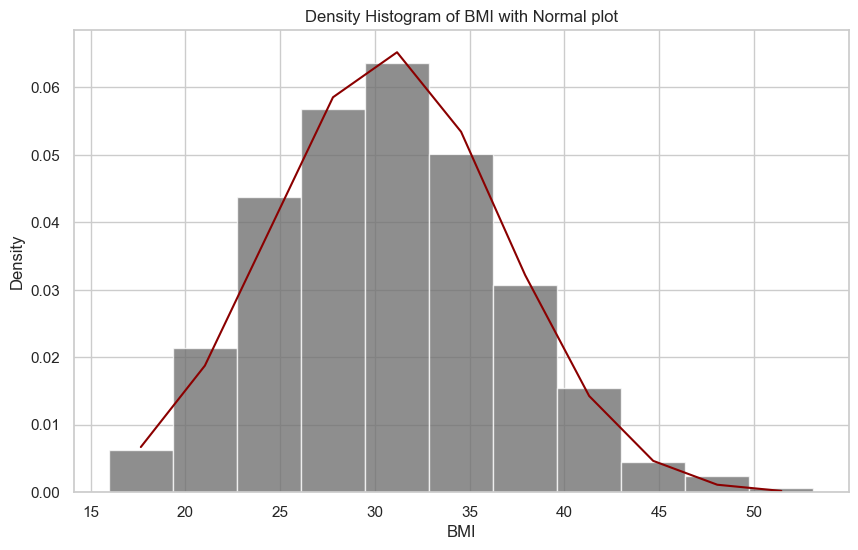

In [54]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(insurance.bmi, color="DimGray", density=True, bins=11, alpha=0.75)
axes.set_xlabel( "BMI")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of BMI with Normal plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]    

bmi_mean = np.mean(insurance.bmi)
bmi_std  = np.std(insurance.bmi)
ys = [norm.pdf( k, loc=bmi_mean, scale=bmi_std) for k in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

The fit here looks really good.

Let's see where the discrepancies are:

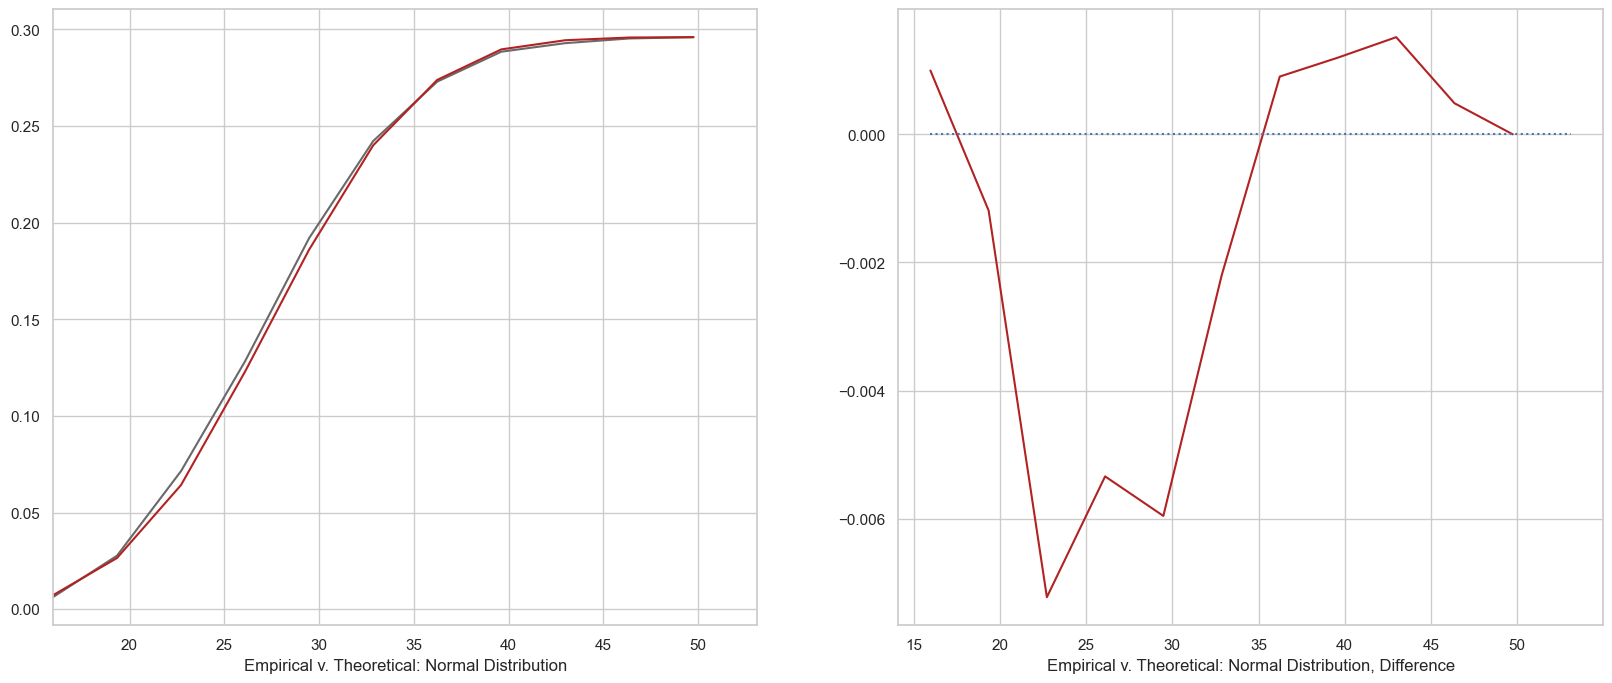

In [55]:
figure = plt.figure(figsize=(20, 8))

bmi_mn = np.min(insurance.bmi)
bmi_mx = np.max(insurance.bmi)
mean = np.mean(insurance.bmi)
std = np.std(insurance.bmi)

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram(insurance.bmi, bins=11, density=True)
cumulative = np.cumsum(values)
axes.plot(base[:-1], cumulative, color="dimgray")
axes.set_xlim((bmi_mn, bmi_mx))

sampled_data = [mean + r * std for r in np.random.standard_normal(10000)]
values2, base = np.histogram(sampled_data, bins=base, density=True)
cumulative2 = np.cumsum(values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((bmi_mn, bmi_mx))
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")

axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot(base[:-1], differences, color='firebrick')
axes.hlines(0, bmi_mn, bmi_mx, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")

plt.show()
plt.close()

The largest discrepancies are around 23 BMI but they are very small.

### Densities? Ick.

Sometimes densities are just a pain.
They're not intuitive (area is probability?) and they're difficult to compare (how big a discrepancy *is* -0.004?).
Since we aren't dealing with *actual* continuous variables (we're using histograms), we may sometimes want to use percentages instead.
In Matplotlib, we can do it this way:

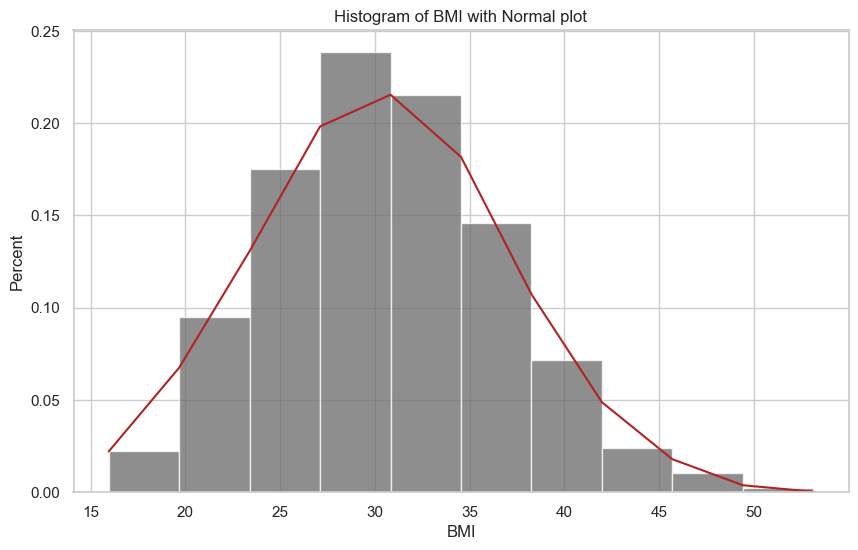

In [56]:
figure = plt.figure(figsize=(10,6))

observations = len(insurance.bmi)
axes = figure.add_subplot(1, 1, 1)
empirical_weights = np.ones(observations)/observations
n, bins, patches = axes.hist(insurance.bmi, color="DimGray", weights=empirical_weights, alpha=0.75)
axes.set_xlabel( "BMI")
axes.set_ylabel( "Percent")
axes.set_title("Histogram of BMI with Normal plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]    

bmi_mean = np.mean(insurance.bmi)
bmi_std  = np.std(insurance.bmi)

sampled_data = [bmi_mean + r * bmi_std for r in np.random.standard_normal(10000)]
theoretical_weights = np.ones(len(sampled_data))/len(sampled_data)
values2, base = np.histogram(sampled_data, bins=base, weights=theoretical_weights)
axes.plot( bins, values2, color="firebrick")

plt.show()
plt.close()

Blessed percentages, I know what these mean.

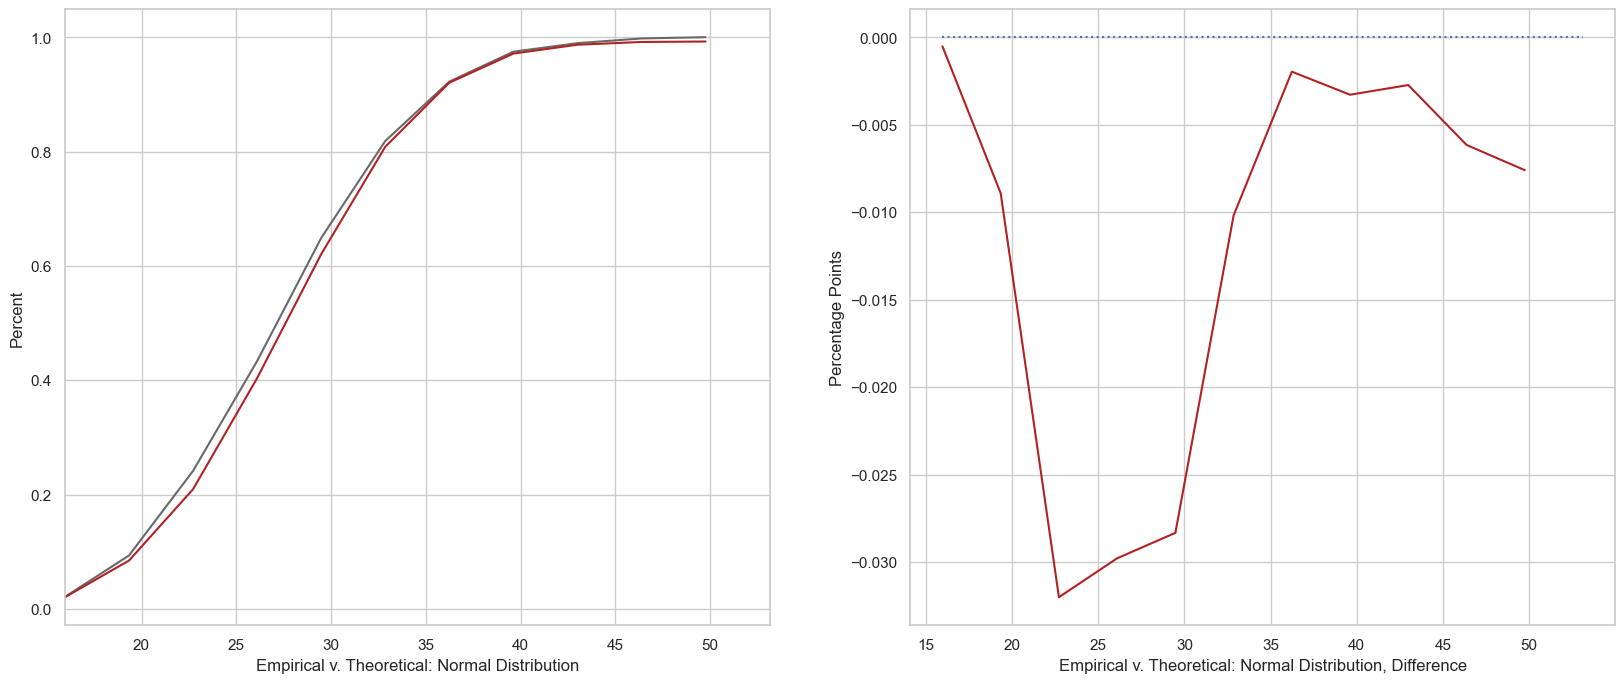

In [57]:
figure = plt.figure(figsize=(20, 8))

bmi_mn = np.min(insurance.bmi)
bmi_mx = np.max(insurance.bmi)
mean = np.mean(insurance.bmi)
std = np.std(insurance.bmi)

axes = figure.add_subplot(1, 2, 1)

values, base = np.histogram(insurance.bmi, bins=11, weights=empirical_weights)
cumulative = np.cumsum(values)
axes.plot(base[:-1], cumulative, color="dimgray")
axes.set_xlim((bmi_mn, bmi_mx))

sampled_data = [mean + r * std for r in np.random.standard_normal(10000)]
values2, base = np.histogram(sampled_data, bins=base, weights=theoretical_weights)
cumulative2 = np.cumsum(values2)
axes.plot( base[:-1], cumulative2, color="firebrick")
axes.set_xlim((bmi_mn, bmi_mx))
axes.set_ylabel("Percent")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")

axes = figure.add_subplot(1, 2, 2)

differences = cumulative2 - cumulative
axes.plot(base[:-1], differences, color='firebrick')
axes.hlines(0, bmi_mn, bmi_mx, linestyles="dotted")
axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution, Difference")
axes.set_ylabel("Percentage Points")

plt.show()
plt.close()

<div style="background: tomato; margin:20px; padding: 20px;">
    <strong>Warning</strong>
    <p>
Just remember, if you go this route, differences are measured in percentage <strong>points</strong>, not percent.
        That is, the difference between the empirical and theoretical distributions at 25 BMI is -0.0175 percentage points, not -1.75 percent.
    They're not the same thing.</p>
</div>

### Question 1

What is the probability of a BMI under 18.5 ("underweight")?

In [58]:
norm.cdf(18.5, bmi_mean, bmi_std)

0.02300300777334836

There is 2.3% probability of seeing a (random) person who is underweight.

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>It's important to remember the source of your data. We can't take the insurance data and extrapolate to all US citizens, for example.</p>
</div>

### Question 2

What is the probability that someone is obese or more (BMI > 30)?

In [59]:
norm.sf(30, bmi_mean, bmi_std)

0.5433299846125761

There is a 54% probability that a random person (who is filing their health claims on our insurance policies) has a BMI of 30 or more.

### Question 3

What is the probability that someone has a "normal" weight (18.5-24.5)?

In [60]:
norm.cdf(24.5, bmi_mean, bmi_std) - norm.cdf(18.5, bmi_mean, bmi_std)

0.13298816080965725

There is a 13.3% probability that a random patient is normal weight.